# BETO model

In [1]:
import pandas as pd

## Datos

### Senators_data

In [2]:
#Import senator csv from senator_data_file
senators = pd.read_csv(r'/Users/mimihuerta/code/jomilu93/sivico/senators_data.csv', converters={'initiative_list': pd.eval}, index_col='Unnamed: 0')
senators.head(2)

,senator_id,Apellidos,Nombre,Fraccion,Legislatura,Estado,Sexo,tipoEleccion,Suplente,estadoOrigen,...,url_sitio,telefono,extension,estatus,direccion,id,senadores,attendance_score,initiative_list,initiatives_summary_dummy
0,1160,Botello Montes,José Alfredo,PAN,64,Querétaro,Hombre,Senador Electo por el Principio de Mayoría Rel...,NaN,Querétaro,...,NaN,5345 3000,4183 y 4184,en_funciones,"Av Paseo de la Reforma No. 135, Hemiciclo Piso...",1,José Alfredo Botello Montes,0.958904,[Pretende garantizar a los miembros del Servic...,Pretende garantizar a los miembros del Servici...
1,1162,Rojas Loreto,Estrella,PAN,64,Querétaro,Mujer,Senadora Electa por el Principio de Mayoría Re...,NaN,Querétaro,...,NaN,5345 3000,3323,en_funciones,"Av Paseo de la Reforma No. 135, Hemiciclo Piso...",2,Estrella Rojas Loreto,0.973913,[Propone que el Estado apoye la investigación ...,Propone que el Estado apoye la investigación e...


In [9]:
type(senators['initiative_list'])

pandas.core.series.Series

In [10]:
#Dataset column names
columnas = senators.columns
columnas

Index(['senator_id', 'Apellidos', 'Nombre', 'Fraccion', 'Legislatura',
       'Estado', 'Sexo', 'tipoEleccion', 'Suplente', 'estadoOrigen', 'correo',
       'facebook', 'twitter', 'youtube', 'instagram', 'url_sitio', 'telefono',
       'extension', 'estatus', 'direccion', 'id', 'senadores',
       'attendance_score', 'initiative_list', 'initiatives_summary_dummy'],
      dtype='object')

<Axes: >

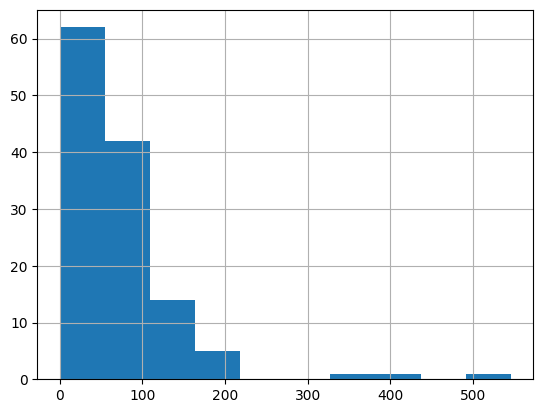

In [32]:
#Number of sentences in the dataset
len_col = [len(prop) for prop in senators["initiative_list"]]
pd.Series(len_col).hist()

<Axes: >

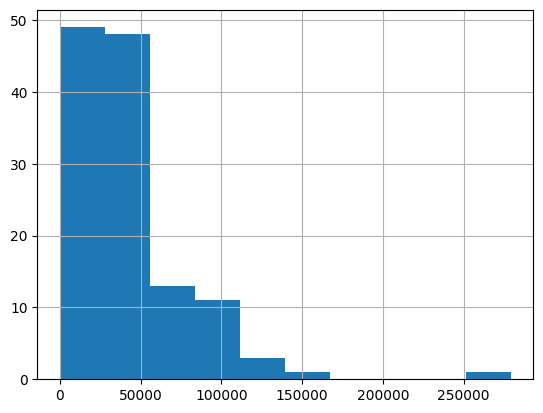

In [38]:
#Number of words in the dataset
len_col = [len(str(prop)) for prop in senators['initiatives_summary_dummy']]
               
pd.Series(len_col).hist()

In [100]:
ex_i = (senators['initiative_list'][4])
ex_i

['Propone modificar las disposiciones constitucionales relativas a los órganos jurisdiccionales y locales, para establecer el principio de paridad de género en su integración; además propone incorporar lenguaje inclusivo en las mismas.',
 'Propone introducir el concepto de Personal de Salud, definiéndola como las personas con título profesional y cédula expedida por las autoridades competentes para ejercer cualquiera de las profesiones a que se refiere las normas vigentes de la Ley General de Salud.',
 'Propone que en los casos en que se trate de información relacionada con la salubridad general en el caso de epidemias de carácter grave o peligro de invasión de enfermedades exóticas en el país, dicha información no se podrá invocar el carácter de reservado.',
 'Propone que en el caso de que la Comisión Jurisdiccional, encargada de llevar a cabo los juicios políticos, quien a su vez no proceda a dictaminar en el plazo de un periodo ordinario de sesiones, la Junta Directiva de cualquiera

In [109]:
ex_s = senators['initiatives_summary_dummy'][1]
len(ex_s)

14197

### Preprocess

In [ ]:
import string
from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [ ]:
def clean(column):
    """Remove punctuation, make strings lower case, remove numbers. Tokenize, remove stopwords and lemmatize."""
    #Removing punctuation.
    for punctuation in string.punctuation:
        column = column.apply(lambda x: x.replace(punctuation, ''))
    #Making lower case and removing whitespace.
    column = column.apply(lambda x: x.lower().strip())
    #Removing numbers
    column = column.apply(lambda x: re.sub(r'[0-9]', '', x))
    #Tokenize all rows.
    #column = column.apply(lambda x: word_tokenize(x))
    #Remove stopwords and words too frequently present in initiative language.
    stop_words = set(stopwords.words('spanish'))
    stop_words_extra = ("pretende", "propone", "exhorta", "modificar", "actualizar", "política", "general",
                        "caso", "derecho", "materia", "virtud", "referencias", "cambiar", "deberán", "día",
                        "año", "denominación", "distrito", "cámara", "senadores", "normativa", "senado",
                        "objetivo", "cumplimiento", "ordenamiento", "república", "reforma", "cada",
                        "dar", "federal", "secretaría", "mención", "paso", "dejar", "principio",
                        "ser", "paridad", "así", "derechos", "reformar", "propone", "nacional",
                        "establecer", "méxico", "persona", "ley", "ciudad", "deberá", "legal", "personas")
    column = column.apply(lambda x: [w for w in x if w not in stop_words])
    column = column.apply(lambda x: [w for w in x if w not in stop_words_extra])
    # Lemmatizing the verbs
    #column = column.apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos = "v") for word in x])
    # 2 - Lemmatizing the nouns
    #column = column.apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos = "n") for word in x])
    # Rejoin words to make sentences
    column = column.apply(lambda x: " ".join(x))
    return column

### Inipros

In [ ]:
data_ip = pd.read_csv("/Users/mimihuerta/code/jomilu93/sivico/inipros.csv", index_col='Unnamed: 0')

In [ ]:
print(data_ip.shape)
data_ip.head(2)

In [ ]:
eg1 = data_ip['sintesis'][7827]
eg1

In [ ]:
ip_column = data_ip["sintesis"]
ip_column

In [ ]:
len_col_ip = [len(prop_in.split()) for prop_in in ip_column]

pd.Series(len_col_ip).hist()

## Model

### Opción 1

In [77]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

In [54]:
tokenizer = AutoTokenizer.from_pretrained("mrm8488/bert2bert_shared-spanish-finetuned-summarization")
model = AutoModelForSeq2SeqLM.from_pretrained("mrm8488/bert2bert_shared-spanish-finetuned-summarization")

The following encoder weights were not tied to the decoder ['bert/pooler']
Some weights of EncoderDecoderModel were not initialized from the model checkpoint at mrm8488/bert2bert_shared-spanish-finetuned-summarization and are newly initialized: ['decoder.bert.encoder.layer.9.attention.self.value.weight', 'decoder.bert.encoder.layer.5.output.LayerNorm.weight', 'decoder.bert.encoder.layer.2.output.dense.bias', 'decoder.bert.encoder.layer.3.output.LayerNorm.weight', 'decoder.bert.encoder.layer.9.output.LayerNorm.weight', 'decoder.bert.encoder.layer.1.attention.output.LayerNorm.weight', 'decoder.bert.encoder.layer.8.attention.output.dense.weight', 'decoder.bert.encoder.layer.0.output.LayerNorm.weight', 'decoder.bert.encoder.layer.0.intermediate.dense.bias', 'decoder.bert.encoder.layer.3.intermediate.dense.bias', 'decoder.bert.encoder.layer.7.attention.self.value.weight', 'decoder.bert.encoder.layer.10.attention.self.value.weight', 'decoder.bert.encoder.layer.1.attention.self.key.bias', 'de

The following encoder weights were not tied to the decoder ['bert/pooler']


In [116]:
inputs = tokenizer.encode("RESUMEN: " + ex_s, return_tensors="pt", max_length=510, truncation=True)
len(inputs[0])

510

In [115]:
resumen = model.generate(
    inputs, 
    max_length=500,
    min_length=40, 
    length_penalty=2.0, 
    num_beams=4, 
    early_stopping=True)

In [94]:
print(tokenizer.decode(resumen[0]))

[CLS] Propone establecer que el instituto de Servicios Periciales y Ciencias Forenses será el área técnica de apoyo a la Fiscalía que tendrá como objetivo fortalecer su capacidad institucional para realizar sus funciones de manera especializada y científica [SEP]


In [65]:
prop_inc_t = senators['initiatives_summary_dummy'][:5]
prop_inc_t

0    Pretende garantizar a los miembros del Servici...
1    Propone que el Estado apoye la investigación e...
2    Propone modificar las disposiciones constituci...
3    Propone eliminar el requisito que establece qu...
4    Propone modificar las disposiciones constituci...
Name: initiatives_summary_dummy, dtype: object

In [91]:
senators["BETO"] = ""

In [96]:
prueba = []

In [106]:
def apply_beto(prop_inc_t):
    count = 0
    for prop_ini in prop_inc_t:
        inputs = tokenizer.encode("RESUMEN: " + prop_ini, return_tensors="pt", max_length=10000, truncation=True)
        resumen = model.generate(inputs, max_length=500, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
        prueba.append(tokenizer.decode(resumen[0]))
        #senators["BETO"][count] = tokenizer.decode(resumen[0])
        #count +=1 

In [107]:
apply_beto(prop_inc_t)

RuntimeError: The expanded size of the tensor (2635) must match the existing size (512) at non-singleton dimension 1.  Target sizes: [1, 2635].  Tensor sizes: [1, 512]

In [ ]:
prueba

In [103]:
tokenizer.model_max_lenght

AttributeError: 'BertTokenizerFast' object has no attribute 'model_max_lenght'

In [ ]:
model.config.max_position_embeddings()
embeddings = TransformerWordEmbeddings(
    "path/to/model",
    layers="-1",
    subtoken_pooling="first",
    fine_tune=True,
    use_context=True,
    allow_long_sentences=True,
    model_max_length=512  # pass length
)

### Opción 2

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("mrm8488/bert2bert_shared-spanish-finetuned-summarization")
model = AutoModelForSeq2SeqLM.from_pretrained("mrm8488/bert2bert_shared-spanish-finetuned-summarization")

In [ ]:
inputs_ip = tokenizer.encode("RESUMEN: " + eg1, return_tensors="pt", max_length=1000, truncation=True)
inputs_ip

In [ ]:
resumen = model.generate(
    inputs_ip, 
    max_length=300,
    min_length=40, 
    length_penalty=2.0, 
    num_beams=4, 
    early_stopping=True)

In [ ]:
print(tokenizer.decode(resumen[0]))

### Opción 3 -- deprecated

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")
model = AutoModelForMaskedLM.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")

In [ ]:
inputs_2 = tokenizer.encode("RESUMEN: " + a, return_tensors="pt", max_length=1000, truncation=True)
inputs_2

In [ ]:
resumen_2 = model.generate(
    inputs, 
    max_length=500, 
    min_length=40, 
    length_penalty=2.0, 
    num_beams=4, 
    early_stopping=True)

In [ ]:
print(tokenizer.decode(resumen_2[0]))